<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> LIME [Local Interpretable Model agnostic Explainations]</p>

##### LIME [Local Interpretable Model agnostic Explainations] where Local means local neighbourbhood of the instance Interpretable means a human should be able to interpret, model agnostic means which are applicable for all models and explaination means explaination that helps the interpretation.

##### Before moving further lets see what is global and local interpretability?

#### Kaggle allows less than 1MB ipynb file so I had to upload all output file along with better explaination over colab so kindly checkout the link below
https://colab.research.google.com/drive/1PlngynWWBAbIrof9VjvkD8WJ59I3pdYG?usp=sharing


##### What is the feature that differentiates these two guys A and B? why does the global model classify the point below B as unhealthy?
For A exercise duration makes the difference with its below point and in B body weight makes the main difference.

###### Also for text data we can see

| Text                                                                       | Class         |
|----------------------------------------------------------------------------|---------------|
| I have a `medical` `emergency`. Hence `Wont` be able to `attend` the `meeting` today | not important |
| hi may i get `information` about your `service`?                          | important     |

##### Similarly for image data too as it mentions the part of image which made it classify to a particular category.



###### Let's explore the intuition behind LIME. Linear models are easy to interpret because they are inherently linear. In such models, the equation is represented as:

$y = w_1x_1 + w_2x_2 + w_3x_3$


Here, $( w1x1 )$ represents the contribution of feature $( x1 )$ to the prediction for a specific data instance. A higher value of $( w1x1 )$ indicates a greater impact of that feature on the prediction.

#### LIME works in 4 steps, which help explain predictions of complex, non-linear models locally.

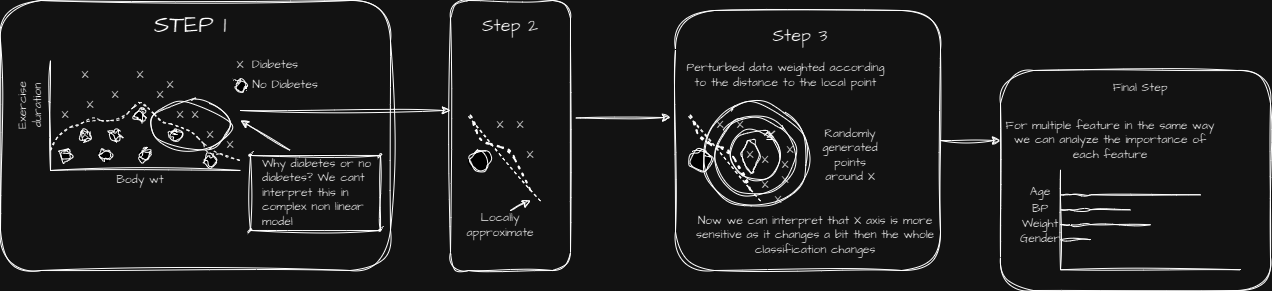

### Step 1: Local and Global Models
The first step shows a complex non-linear model where the classification of data points (e.g., "Diabetes" and "No Diabetes") is plotted based on features like body weight and exercise duration. The diagram highlights that it’s difficult to interpret why a specific point is classified in a certain way due to the model's complexity.

### Step 2: Local Linear Approximation
- In this step, LIME simplifies the complex non-linear model by locally approximating the area around the data point of interest. Instead of trying to interpret the entire model, LIME creates a linear model only for the points close to the selected instance. This makes the model easier to understand locally.

### Step 3: Perturbed Data and Distance Weighting
- This step shows how LIME generates perturbed (slightly altered) data points around the selected instance and weighs them according to their proximity. Random data points around the selected instance are generated, and their distances from the original point are measured. The idea is that features near the selected instance have more weight and influence, helping interpret which feature is more sensitive.

For example, in the diagram, the X-axis (body weight) is marked as sensitive since slight changes to this feature can flip the classification outcome.

### Final Step: Feature Importance
- In the last step, LIME generalizes the importance of each feature by applying the same local approximation strategy across multiple features. It calculates how important different features (e.g., age, blood pressure, weight, gender) are to the specific prediction. This provides an interpretable explanation of the model’s behavior for the selected data point.

### Summary
LIME works by:
1. Distinguishing between local and global models to avoid complex global interpretation.
2. Creating a simple, interpretable linear model near the selected data point.
3. Using perturbed data points and distance-based weighting to understand feature sensitivity.
4. Repeating the process to assess the importance of all features relevant to the specific instance.


In the image, we generate perturbed instances by highlighting superpixels with the highest positive weights as the explanation, while graying out all other areas.

### NOTE: kaggle allows less than 1MB ipynb file so I had to upload all output file along with better explaination over colab so kindly checkout the link below
https://colab.research.google.com/drive/1PlngynWWBAbIrof9VjvkD8WJ59I3pdYG?usp=sharing

<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> Mathematical Representation of LIME</p>
### Original Representation of Data

$$
\mathbf{x} \in \mathbb{R}^d
$$

### Transformed Representation

$$
\mathbf{x}' = h^{-1}(h(\mathbf{x}))
$$

### More Interpretable Representation or rather human interpretable representation of the instance (segments)

$$
\mathbf{x}' \in \{0, 1\}^d
$$

### Optimization Problem

$$
\Xi(\mathbf{x}) = \arg\min_{q \in \mathcal{L}} \left[ \sum_{i} L(f_i, g_i, \pi_i, \mathbf{x}) + \lambda(q) \right]
$$

Where:
- $( \Xi(\mathbf{x}) )$ is the optimization function.
- $( q \in \mathcal{L} )$ represents a family of interpretable models.
- $( \sum_{i} L(f_i, g_i, \pi_i, \mathbf{x}) )$ represents a sum over the prediction errors (loss function).
- $( \lambda(q) )$ is a complexity measure for model \( q \).

### Complexity Measure Equation

$$
u = u' \left( \frac{d}{d'} \right)
$$

Where,

- $ \mathbf{x} \in \mathbb{R}^d $ : Original representation of the data in d-dimensional space.
- $ h(\cdot) $ : Transformation function (e.g., logarithmic or other transformations).
- $ \mathbf{x}' \in \{0, 1\}^d $ : Transformed representation, possibly interpretable for human analysis.
- $ \Xi(\mathbf{x}) $ : The optimized model.
- $ q \in \mathcal{L} $ : Family of interpretable models.
- $ \sum_{i} L(f_i, g_i, \pi_i, \mathbf{x}) $ : Sum of loss functions over all observations.
- $ \lambda(q) $ : Complexity measure of model \( q \).
- $ \mathbf{x} $ : The predicted instance we want to explain.
- $ f $ : The complex model being explained.
- $ g $ : The simple surrogate model.
- $ \pi_i $ : The neighborhood of $ \mathbf{x} $.
- $ \lambda(q) $ : The complexity measure of $ g $.

## Now this becomes a whole new problem let us see how we optimize it


### 1. Minimizing the Loss Function:
- The goal of LIME is to find a **simple surrogate model** $( g )$ that approximates the predictions of a **complex model** $( f )$ in a local neighborhood around an instance $( \mathbf{x} )$.

- The **loss function** that LIME tries to minimize is written as:
  $$
  L(f, g, \pi_n) \quad \text{Local function L}
  $$
  This represents the **local loss** between the predictions of the complex model \( f \) and the surrogate model \( g \), weighted by the local neighborhood defined by \( \pi_n \). 

### 2. Local Behavior of the Complex Model:
- LIME focuses on approximating the behavior of the complex model \( f \) in a **local neighborhood** of   - $( f(z) )$ is the prediction of the **complex model** for the perturbed instance $( z )$.
  - $( f(z) )$ is the prediction of the **complex model** for the perturbed instance ( z ).
  - $( g(z) )$ is the prediction of the **simple surrogate model** for the same instance ( z ).
  - $( \pi_n(z) )$ is a weight assigned to each perturbation ( z ), representing its importance in the neighborhood of $( \mathbf{x} )$.
  - The goal is to **minimize** the difference between the complex model’s predictions $(f(z))$ and the surrogate model’s predictions \( g(z) \), giving more importance to points that are closer to $( \mathbf{x} )$ (i.e., ( z ) is close to $(\mathbf{x}))$.

- The weighted loss is given by:
  $$
  L(f, g, \pi_n) = \sum_{z \in Z} \pi_n(z) \left( f(z) - g(z) \right)^2
  $$


### 3. Weighting Function for Local Samples:
- The weight assigned to each perturbation \( z \) is determined by its distance from the instance \( \mathbf{x} \), using a kernel function:
  $$
  \pi_n(z) = \exp\left( \frac{-D(\mathbf{x}, z)^2}{\sigma} \right)
  $$

  Where:
  - $( D(\mathbf{x}, z) )$ is the **Euclidean distance** between the instance $( \mathbf{x} )$ and the perturbed sample $( z )$.
  - $( \sigma )$ is the **kernel width** (a parameter that controls how fast the weight decays with distance).

- This formula ensures that samples $( z )$ that are **closer to $( \mathbf{x} )$** get a higher weight (i.e., they are more important for fitting the surrogate model), while samples that are further away receive smaller weights.



In [ ]:
!pip install lime
!pip install transformers shap datasets

<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> LIME on TEXT DATA</p>

In [ ]:
# Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import OrderedDict

In [ ]:
# Load training data
train_df = pd.read_csv("/kaggle/input/quora-insincere-questions-classification/train.csv")
print("Train shape : ", train_df.shape)

In [ ]:
train_df.head()

In [ ]:
# Display rows with NaN values
nan_rows = train_df[train_df.isna().any(axis=1)]
print(nan_rows)

In [ ]:
# Remove rows with NaN values
train_df = train_df.dropna()
print("Train shape : ", train_df.shape)

In [ ]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=2018)
val_df.head()

In [ ]:
# Select specific rows from validation set based on qid for inspection
df_select = pd.concat([val_df[val_df['qid'] == '1ffecf3a38aa5062f51c'], val_df[val_df['qid'] == 'd61b098340966d9d6501']], axis=0)
df_select.question_text

In [ ]:
# Reset index of validation dataframe
val_df.reset_index(drop=True, inplace=True)
val_df.head()

In [ ]:
# Create a TF-IDF vectorizer and transform the training and validation data

## vectorize to tf-idf vectors
tfidf_vc = TfidfVectorizer(min_df = 10, max_features = 100000, analyzer = "word", ngram_range = (1, 2), stop_words = 'english', lowercase = True)
train_vc = tfidf_vc.fit_transform(train_df["question_text"])
val_vc = tfidf_vc.transform(val_df["question_text"])

In [ ]:
# Train a Logistic Regression model on the training data

model = LogisticRegression(C = 0.5, solver = "sag")
model = model.fit(train_vc, train_df.target)

# Predict on the validation data
val_pred = model.predict(val_vc)

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(val_df.target, val_pred)
precision = precision_score(val_df.target, val_pred)
recall = recall_score(val_df.target, val_pred)
f1 = f1_score(val_df.target, val_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(val_df.target, val_pred)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# Display classification report
# Define class names
class_names = ["sincere", "insincere"]
class_report = classification_report(val_df.target, val_pred, target_names=class_names)
print("Classification Report:\n", class_report)

In [ ]:
# Filter the rows where target is 1
target_1_rows = val_df[val_df['target'] == 1]

# Print the filtered rows and their row indices
print("Rows with target = 1:")
target_1_rows.head()

In [ ]:
y=target_1_rows.index.tolist()

In [ ]:
# Select a specific instance from the validation set for explanation
import numpy as np
prediction_index = 20
idx = int(val_df.index[prediction_index])
# print(idx)
c = make_pipeline(tfidf_vc, model)
class_names = ["sincere", "insincere"]

# Create a LIME text explainer
explainer = LimeTextExplainer(class_names = class_names)

# Explain the prediction for the selected instance
exp = explainer.explain_instance(val_df["question_text"][idx], c.predict_proba, num_features = 10)

# Print the selected question text and its prediction probabilities
print(val_df["question_text"][idx])
print("Probability (Insincere) =", c.predict_proba([val_df["question_text"][idx]])[0, 1])
print("Probability (Sincere) =", c.predict_proba([val_df["question_text"][idx]])[0, 0])
print("True Class is:", class_names[int(val_df["target"][idx])])

In [ ]:
# Get explanation weights as a list of tuples
exp.as_list()

In [ ]:
# Print original prediction probability
print('Original prediction:',  model.predict_proba(val_vc[prediction_index])[0, 1])

# Create a copy of the selected instance's TF-IDF vector and modify specific features
tmp = val_vc[prediction_index].copy()
tmp[0, tfidf_vc.vocabulary_['indians']] = 0
tmp[0, tfidf_vc.vocabulary_['europeans']] = 0

# Print prediction after removing specific features
print('Prediction after removing some features:', model.predict_proba(tmp)[0, 1])

# Print the difference in prediction probabilities
print('Difference:', model.predict_proba(tmp)[0, 1] - model.predict_proba(val_vc[prediction_index])[0, 1])

In [ ]:
# Display LIME explanation in a notebook
exp.show_in_notebook(text=val_df["question_text"][idx], labels=(1,))

In [ ]:
# Extract and plot LIME weights
weights = OrderedDict(exp.as_list())
lime_weights = pd.DataFrame({"words": list(weights.keys()), "weights": list(weights.values())})

# Plot the feature weights
sns.barplot(x = "words", y = "weights", data = lime_weights, palette="viridis")
plt.xticks(rotation = 45)
plt.title("Sample {} features weights given by LIME".format(idx))
plt.show()


<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> LIME on Image</p>

In [ ]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

In [ ]:
inet_model = inc_net.InceptionV3()

In [ ]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [ ]:
images = transform_img_fn(['/kaggle/input/cat-jpeg/cat.jpeg']) 
#images = transform_img_fn([os.path.join('data','Tiger-1.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [ ]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime

In [ ]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=8, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=6, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> LIME on Tabular data</p>

In [ ]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function

# Set seed for reproducibility
np.random.seed(1)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset from sklearn
iris_data = load_iris()

# Create a DataFrame from the dataset
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target column to the DataFrame
iris_df['target'] = iris_data.target

# Display the head of the DataFrame
iris_df.head()

In [ ]:
iris = sklearn.datasets.load_iris()

In [ ]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(iris.data, iris.target, train_size=0.80)

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train, labels_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict labels on the test set
predicted_labels = rf.predict(test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predicted_labels)

# # Calculate precision
precision = precision_score(labels_test, predicted_labels, average='weighted')

# # Calculate recall
recall = recall_score(labels_test, predicted_labels, average='weighted')

# # Calculate F1 score
f1 = f1_score(labels_test, predicted_labels, average='weighted')

# Display summary
print("Summary:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(labels_test, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=iris.feature_names, class_names=iris.target_names, discretize_continuous=True)

print(iris.feature_names)
print(iris.target_names)

In [ ]:
# i = np.random.randint(0, test.shape[0])
i=12

#Explain the instance using LIME
exp = explainer.explain_instance(test[i], rf.predict_proba, num_features=6, top_labels=1)

#Visualize the explanation
print(test[i], predicted_labels[i])
print(iris.feature_names)
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
print(test[12])

In [ ]:
i = np.random.randint(0, test.shape[0])
print(test.shape[0])

In [ ]:
print( rf.predict_proba(test[i].reshape(1,-1)))

In [ ]:
feature_index = lambda x: iris.feature_names.index(x)

In [ ]:
i= 12

temp = test[i].copy()
temp_before = test[i].copy()

temp[feature_index('petal width (cm)')] = temp[feature_index('petal width (cm)')] - 1.5

print('Petal width before:', temp_before[feature_index('petal width (cm)')])
print('Petal width after:', temp[feature_index('petal width (cm)')])
print ()

print('P(setosa) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,0])
print('P(setosa) after:', rf.predict_proba(temp.reshape(1,-1))[0,0])
print ()

print('P(versicolor) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,1])
print('P(versicolor) after:', rf.predict_proba(temp.reshape(1,-1))[0,1])
print ()

print('P(virginica) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,2])
print('P(virginica) after:', rf.predict_proba(temp.reshape(1,-1))[0,2])
print ()

In [ ]:
import matplotlib.pyplot as plt

# Make a copy of the instance
temp = test[i].copy()
temp_before = test[i].copy()

# Increase petal length by 1
temp[feature_index('petal width (cm)')] -= 1.7

# Predict probabilities before and after perturbation
proba_before = rf.predict_proba(temp_before.reshape(1,-1))[0]
proba_after = rf.predict_proba(temp.reshape(1,-1))[0]

# Labels for the plot
labels = iris.target_names

# Plotting
fig, ax = plt.subplots()
x = np.arange(len(labels))
width = 0.35

# Plot probabilities before and after perturbation
rects1 = ax.bar(x - width/2, proba_before, width, label='Before')
rects2 = ax.bar(x + width/2, proba_after, width, label='After')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Probability')
ax.set_title('Effect of changing Petal Width')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
print('Petal length before:', temp_before[feature_index('petal length (cm)')])
print('Petal length after:', temp[feature_index('petal length (cm)')])
print ()
print('Petal width before:', temp_before[feature_index('petal width (cm)')])
print('Petal width after:', temp[feature_index('petal width (cm)')])
print ()
plt.show()

In [ ]:
temp = test[i].copy()
temp_before = test[i].copy()

temp[feature_index('petal length (cm)')] = temp[feature_index('petal length (cm)')] + 1

print('Petal length before:', temp_before[feature_index('petal length (cm)')])
print('Petal length after:', temp[feature_index('petal length (cm)')])
print ()

print('P(setosa) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,0])
print('P(setosa) after:', rf.predict_proba(temp.reshape(1,-1))[0,0])
print ()

print('P(versicolor) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,1])
print('P(versicolor) after:', rf.predict_proba(temp.reshape(1,-1))[0,1])
print ()

print('P(virginica) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,2])
print('P(virginica) after:', rf.predict_proba(temp.reshape(1,-1))[0,2])
print ()

In [ ]:
import matplotlib.pyplot as plt

# Make a copy of the instance
temp = test[i].copy()
temp_before = test[i].copy()

# Increase petal length by 1
temp[feature_index('petal length (cm)')] -= 4.5

# Predict probabilities before and after perturbation
proba_before = rf.predict_proba(temp_before.reshape(1,-1))[0]
proba_after = rf.predict_proba(temp.reshape(1,-1))[0]

# Labels for the plot
labels = iris.target_names

# Plotting
fig, ax = plt.subplots()
x = np.arange(len(labels))
width = 0.35

# Plot probabilities before and after perturbation
rects1 = ax.bar(x - width/2, proba_before, width, label='Before')
rects2 = ax.bar(x + width/2, proba_after, width, label='After')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Probability')
ax.set_title('Effect of changing Petal Length')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
print('Petal length before:', temp_before[feature_index('petal length (cm)')])
print('Petal length after:', temp[feature_index('petal length (cm)')])
print ()
print('Petal width before:', temp_before[feature_index('petal width (cm)')])
print('Petal width after:', temp[feature_index('petal width (cm)')])
print ()
plt.show()

In [ ]:
temp = test[i].copy()
temp_before = test[i].copy()

temp[feature_index('petal length (cm)')] = temp[feature_index('petal length (cm)')] -1
temp[feature_index('petal width (cm)')] = temp[feature_index('petal width (cm)')] + 2

print('Petal length before:', temp_before[feature_index('petal length (cm)')])
print('Petal length after:', temp[feature_index('petal length (cm)')])
print ()

print('Petal width before:', temp_before[feature_index('petal width (cm)')])
print('Petal width after:', temp[feature_index('petal width (cm)')])
print ()

print('P(setosa) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,0])
print('P(setosa) after:', rf.predict_proba(temp.reshape(1,-1))[0,0])
print ()

print('P(versicolor) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,1])
print('P(versicolor) after:', rf.predict_proba(temp.reshape(1,-1))[0,1])
print ()

print('P(virginica) before:', rf.predict_proba(temp_before.reshape(1,-1))[0,2])
print('P(virginica) after:', rf.predict_proba(temp.reshape(1,-1))[0,2])
print ()

In [ ]:
import matplotlib.pyplot as plt

# Make a copy of the instance
temp = test[i].copy()
temp_before = test[i].copy()

# Increase petal length by 1
temp[feature_index('petal length (cm)')] -= 4.5
temp[feature_index('petal width (cm)')] -= 1.5

# Predict probabilities before and after perturbation
proba_before = rf.predict_proba(temp_before.reshape(1,-1))[0]
proba_after = rf.predict_proba(temp.reshape(1,-1))[0]

# Labels for the plot
labels = iris.target_names

# Plotting
fig, ax = plt.subplots()
x = np.arange(len(labels))
width = 0.35

# Plot probabilities before and after perturbation
rects1 = ax.bar(x - width/2, proba_before, width, label='Before')
rects2 = ax.bar(x + width/2, proba_after, width, label='After')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Probability')
ax.set_title('Effect of changing Petal Length and Width')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
print('Petal length before:', temp_before[feature_index('petal length (cm)')])
print('Petal length after:', temp[feature_index('petal length (cm)')])
print ()
print('Petal width before:', temp_before[feature_index('petal width (cm)')])
print('Petal width after:', temp[feature_index('petal width (cm)')])
print ()
plt.show()

In [ ]:
exp.show_in_notebook(show_table=True, show_all=True)



<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> Limitations of LIME</p>

- **Local vs Global**:
  - **LIME** explains the behavior of the model **locally** for individual predictions by focusing on the neighborhood of $( \mathbf{x} )$. While this provides useful insights for a specific instance, it **may not capture the global behavior** of the model. 
  - In other words, LIME is designed to explain one prediction at a time, which might not generalize to other predictions or the overall decision boundaries of the model.

- **Linear Assumption**:
  - LIME approximates the complex model using a **linear surrogate model**. This is a simplification, which works well for **small local neighborhoods**, but can lead to inaccuracies in more complex regions where the model behaves in a non-linear manner.
  - The **linear approximation** might not represent the true complexity of the model’s decision boundary, especially when the complex model uses highly non-linear relationships to make its predictions.

<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> SHAP [Shapley Additive Explainations]</p>

SHAP (SHapley Additive exPlanations) is another Explainable AI method used to explain the output of machine learning models. It helps to interpret the predictions made by complex models by assigning a value to each feature based on its contribution to the prediction

SHAP is based on a straightforward idea. Imagine a team of five people participating in a hackathon:

1. The first person is skilled in machine learning (ML).
2. The second person is an expert in backend development.
3. The third person specializes in DevOps tools.
4. The fourth person has excellent ML and communication skills.
5. The fifth person is new to the team and helps with documentation.

The prize money is distributed as follows:
- First place: 50,000 USD,
- Second place: 30,000 USD,
- Third place: 10,000 USD

To fairly distribute the prize money, we need to consider how each team member contributed since some may have worked harder than others. Instead of splitting the prize equally, we look at different combinations of team members to see their contributions.

For example:
- If only the 1st, 2nd, 4th, and 5th members participated, they would earn the 3rd place prize.
- If all team members participate, they would earn the 1st place prize.
- If the 1st, 2nd, 3rd, and 5th members are involved, they would get the 2nd place prize.
- If the 1st, 3rd, 4th, and 5th members are included, they wouldn't place at all.
- If the 1st, 2nd, 3rd, and 4th members work together, they would again win 1st place.

By considering all possible combinations of team members, we can determine a fair way to distribute the prize money based on each member’s contribution.

So in short
- To calculate the true individual contribution we need to consider different subsets.
- We calculate the individual's contribution for each subset and then do an average of these contribution to find the marginal contribution of each player.

Imagine we are building a model to classify individuals as diabetic or non-diabetic. We have several features, including age, exercise duration, BMI, the presence of diabetic parents, and calorie intake. In this scenario, it's essential to determine which feature has the most significant impact on the model's predictions. Since we are dealing with specific cases, we need local interpretation rather than generalization.

So while creating subset we need to keep this thing in mind that the dimenions should be correct we we fill with random values in the missing feature

| Features              | 1    | 2    | 3    | 4    | 5    |
|-----------------------|------|------|------|------|------|
| Subset                | 1    |      | 3    |      | 5    |
| correct_dimensions_subset | 1    | Rand | 3    | Rand | 5    |

Mathematical intuition:

$$
Q_i(f_j = x) = \sum \frac{|Z'|! (M - |Z'| - 1)!}{M!} \left[ f_u(Z') - f_x(Z' \setminus \{i\}) \right]
$$

where,

- $( Q_i )$ be the **Shapley value** for feature $( i )$,
- $( f )$ be the **ML model**,
- $( x )$ be a **data point**,
- $( Z' )$ be the **subsets of features**,
- $( x' )$ is **simplified to** $( x' )$ **by mapping**,
- $( \left( \sum \frac{|Z'|! (M - |Z'| - 1)!}{M!} \right) )$ is the **weighting term**, where $(M)$ is the **total number of features**, and $( Z' )$ is the **number of subsets with feature** $( i )$ and $(|Z'|!)$ is the factorial of the size of the subset $( Z' )$,$( (M - |Z'| - 1)! )$ is the factorial of the number of features not included in the subset and $( M!)$ is the factorial of the total number of features.
- $( f_x(Z') )$ represents the prediction **with feature** $( i )$ of interest,
- $( f_x(Z' \setminus \{i\}) )$ represents the prediction **without feature** $( i )$ (the feature of interest).

Some of the important plots
- beesworm summary plot
- dependence plot
- heatmap
- decision plot
- imageplot
- textplot
- scatterplot
- forceplot
- waterfall plot
- barplot




<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> SHAP for Text data</p>

In [ ]:
import datasets
import numpy as np
import transformers
import shap

In [ ]:
dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]

In [ ]:
print(dataset[0])


In [ ]:
print(short_data[0])

In [ ]:
import pandas as pd

# Create a pandas dataframe
df = pd.DataFrame(short_data)

# Display the head of the dataframe
df.head()

In [ ]:
classifier = transformers.pipeline("sentiment-analysis", return_all_scores=True)

In [ ]:
texts = ["I love this movie! It was the best movie of all time", "I liked the first half but did not like the second half."]

results = classifier(texts)
print(results)

In [ ]:
print("1: ", short_data[0],"\n")
print("2: ", short_data[1],"\n")
print("3: ",short_data[2],"\n")
print("\n")
print(classifier(short_data[:3]))

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the sentiment for the short data
predictions = classifier(short_data)

# Convert the predictions to labels
predicted_labels = []
for prediction in predictions:
    predicted_label = max(prediction, key=lambda x: x['score'])['label']
    predicted_labels.append(0 if predicted_label == 'NEGATIVE' else 1)  # Assuming 'NEGATIVE' is 0 and 'POSITIVE' is 1

true_labels = dataset["label"][:20]  # Get the true labels

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

print(true_labels)

print(predicted_labels)

In [ ]:
print(dataset[12500])

In [ ]:
# define the explainer
explainer = shap.Explainer(classifier)
shap_values = explainer(short_data[:2])

In [ ]:
print(shap_values.shape)

In [ ]:
shap.plots.text(shap_values[0])  # Index into a single instance


In [ ]:
shap.plots.text(shap_values[1])  # Index into a single instance

In [ ]:
masker = shap.maskers.Text(classifier.tokenizer)
explainer3 = shap.Explainer(pmodel, masker)
shap_values3 = explainer3(short_data[:2])
shap.plots.text(shap_values[0])

In [ ]:
masker.shape("I like this movie.")

model_args = masker(
    np.array([True, True, True, True, True, True, True]), "I like this movie."
)
model_args

In [ ]:
pmodel(*model_args)

In [ ]:
model_args = masker(
    np.array([True, True, False, False, True, True, True]), "I like this movie."
)
model_args

In [ ]:
pmodel(*model_args)

In [ ]:
masker2 = shap.maskers.Text(
    classifier.tokenizer, mask_token="...", collapse_mask_token=True
)

In [ ]:
model_args2 = masker2(
    np.array([True, True, False, False, True, True, True]), "I like this movie."
)
model_args2

In [ ]:
pmodel(*model_args2)

In [ ]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:20])

In [ ]:
shap.plots.bar(shap_values[0, :, "POSITIVE"])



<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> SHAP for Image data
</p>

In [ ]:
import json
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap
import numpy as np
import matplotlib.pyplot as plt

model = ResNet50(weights="imagenet")
X, y = shap.datasets.imagenet50()

In [ ]:
print(y)

In [ ]:
plt.imshow(X[20])

In [ ]:
# Assuming X[8] contains integer data that needs to be scaled to the range [0, 255]
X = np.clip(X, 0, 255).astype(np.uint8)

plt.imshow(X[5])

In [ ]:
print(X.shape)

In [ ]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
    
print("Number of ImageNet classes:", len(class_names))
print("Class names:", class_names)

In [ ]:
print(y[17])

In [ ]:
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

masker = shap.maskers.Image("inpaint_telea", X[0].shape)

explainer = shap.Explainer(f, masker, output_names=class_names)

shap_values = explainer(
    X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)

In [ ]:
# output with shap values
shap.image_plot(shap_values)

In [ ]:
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

shap_values_fine = explainer_blur(
    X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4]
)

In [ ]:
# output with shap values
shap.image_plot(shap_values_fine)



<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> SHAP for tabular data
</p>

In [ ]:
!pip install plotly
!pip install xgboost

In [ ]:
import matplotlib.pylab as pl
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

X_display.head()

In [ ]:
print(y_display)

In [ ]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
}
model = xgboost.train(
    params,
    d_train,
    5000,
    evals=[(d_test, "test")],
    verbose_eval=100,
    early_stopping_rounds=20,
)

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred_prob = model.predict(d_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
xgboost.plot_importance(model,importance_type="weight")
pl.title("xgboost.plot_importance(model)")
pl.show()

In [ ]:
#The "cover" metric measures the coverage of a feature, which is the number of
#samples or observations that are affected by splits involving that feature.
#Essentially, it represents how frequently a feature is used to partition
#the data and how many data points fall into those partitions.

xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

In [ ]:
#Gain represents the improvement in the objective function (such as accuracy or log loss)
#that a feature provides when it is used in a split. It quantifies the
#contribution of a feature to the model's performance.

xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [ ]:
import plotly.io as pio
# This takes 5-6 minutes since we are explaining over 30
#thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


In [ ]:
# print the JS visualization code to the notebook
shap.initjs()  # Ensure this line is uncommented

shap.force_plot(explainer.expected_value, shap_values[100, :], X_display.iloc[100, :])

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()  # Ensure this line is uncommented

shap.force_plot(
    explainer.expected_value, shap_values[:1000, :], X_display.iloc[:1000, :]
)

In [ ]:
shap.summary_plot(shap_values, X_display, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)

<a id="1"></a>
# <p style="background-image: url(https://imgs.search.brave.com/3Ovn1cnTnO_EYyqycPskakTHq9aZV-W7gNUuAUWqeco/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93YWxs/cGFwZXJjYXZlLmNv/bS93cC93cDI3MjY3/MDYuanBn);font-family:camtasia;font-size:120%;color:#ffffff;text-align:center;border-radius:20px 50px; padding:10px"> Resources
</p>

#### SHAP: https://arxiv.org/abs/1602.04938
#### SHAP GitHub: https://github.com/shap/shap
#### SHAP docs: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
#### LIME: https://arxiv.org/abs/1602.04938
#### LIME GitHub: https://github.com/marcotcr/lime
#### YouTube: https://www.youtube.com/playlist?list=PLPTV0NXA_ZShaln9GfiHO_c0HzOSqLOGv